In [1]:
# Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
main_data = pd.read_csv('telecom_churn_data.csv')
main_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#checking null percentages
nulldf = (main_data.isnull().sum()/len(main_data) * 100).to_frame('Null Percentage').sort_values('Null Percentage', ascending=False) 
nulldf

,Null Percentage
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [5]:
#deleting those with more than 30 percent null values
k=main_data.columns

for x in k:
    if((100*main_data[x].isnull().sum()/len(main_data.index))>=30):
        main_data.drop(x, axis = 1, inplace = True)

In [6]:
nulldfnew = (main_data.isnull().sum()/len(main_data) * 100).to_frame('Null Percentage').sort_values('Null Percentage', ascending=False) 
nulldfnew

,Null Percentage
loc_og_t2m_mou_9,7.745077
loc_ic_t2m_mou_9,7.745077
offnet_mou_9,7.745077
std_ic_t2f_mou_9,7.745077
roam_ic_mou_9,7.745077
...,...
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
last_day_rch_amt_6,0.000000


In [7]:
main_data.shape

(99999, 186)

In [8]:
#removing columns with only unique values 
for a in main_data.columns:
    if len(main_data[a].unique()) == 1:
        main_data.drop(a,inplace=True,axis=1)

In [9]:
main_data.shape

(99999, 184)

In [10]:
#gathering all the date columns
date_cols = []
for b in main_data.columns:
    if "date" in b:
        date_cols.append(b)

In [11]:
date_cols

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [12]:
#dropping date columns as theyre worthless in this case
main_data = main_data.drop(date_cols, axis=1)
main_data.shape

(99999, 177)

In [13]:
nulldf3 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf3

,Null Percentage
std_og_t2t_mou_9,7.745
loc_og_t2m_mou_9,7.745
roam_og_mou_9,7.745
isd_og_mou_9,7.745
std_ic_t2f_mou_9,7.745
...,...
max_rech_amt_8,0.000
max_rech_amt_9,0.000
last_day_rch_amt_6,0.000
last_day_rch_amt_7,0.000


In [14]:
col_7745 = nulldf3['Null Percentage'] == 7.745
newcol_7745 = nulldf3[col_7745].index.values
newcol_7745   

array(['std_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'roam_og_mou_9',
       'isd_og_mou_9', 'std_ic_t2f_mou_9', 'loc_og_t2t_mou_9',
       'std_og_mou_9', 'std_og_t2c_mou_9', 'std_ic_mou_9',
       'roam_ic_mou_9', 'std_og_t2f_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2o_mou_9',
       'loc_ic_mou_9', 'spl_og_mou_9', 'loc_og_mou_9', 'std_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'og_others_9', 'ic_others_9',
       'loc_ic_t2f_mou_9', 'offnet_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9', 'loc_ic_t2t_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9'],
      dtype=object)

In [15]:
#replacing null values with zeroes because in the dataframe all values are for same month(december) and have the same value(7.745) 
#and same category(mou=minutes of usage) thus showing that they are meaningful missing values and the customer did not recharge
main_data[newcol_7745] = main_data[newcol_7745].fillna(0)

In [16]:
nulldf4 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf4

,Null Percentage
isd_og_mou_8,5.378
std_ic_t2t_mou_8,5.378
roam_og_mou_8,5.378
loc_ic_t2f_mou_8,5.378
loc_ic_t2m_mou_8,5.378
...,...
loc_ic_t2t_mou_9,0.000
total_og_mou_9,0.000
total_og_mou_8,0.000
total_og_mou_7,0.000


In [17]:
col_5378 = nulldf4['Null Percentage'] == 5.378
newcol_5378 = nulldf3[col_5378].index.values
newcol_5378

array(['std_og_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2o_mou_8', 'std_og_t2f_mou_8', 'og_others_8',
       'loc_ic_t2m_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'isd_og_mou_8',
       'std_og_t2t_mou_8', 'spl_og_mou_8', 'std_ic_t2f_mou_8',
       'loc_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'roam_og_mou_8',
       'roam_ic_mou_8', 'loc_og_t2t_mou_8', 'offnet_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'onnet_mou_8',
       'std_ic_mou_8', 'loc_og_mou_8', 'loc_og_t2c_mou_8', 'ic_others_8'],
      dtype=object)

In [18]:
#same pattern repeating as above so replace this as well
main_data[newcol_5378] = main_data[newcol_5378].fillna(0)

In [19]:
nulldf5 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf5

,Null Percentage
loc_ic_t2f_mou_6,3.937
loc_og_mou_6,3.937
loc_ic_t2t_mou_6,3.937
spl_og_mou_6,3.937
loc_og_t2m_mou_6,3.937
...,...
spl_og_mou_8,0.000
isd_og_mou_9,0.000
isd_og_mou_8,0.000
std_og_mou_9,0.000


In [20]:
col_3937 = nulldf5['Null Percentage'] == 3.937
newcol_3937 = nulldf3[col_3937].index.values
newcol_3937

array(['isd_ic_mou_6', 'std_ic_t2t_mou_6', 'roam_ic_mou_6',
       'std_ic_t2f_mou_6', 'loc_ic_mou_6', 'loc_ic_t2t_mou_6',
       'ic_others_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'roam_og_mou_6',
       'loc_ic_t2m_mou_6', 'onnet_mou_6', 'og_others_6', 'std_ic_mou_6',
       'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2m_mou_6',
       'loc_og_mou_6', 'std_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6',
       'spl_ic_mou_6', 'loc_og_t2m_mou_6', 'isd_og_mou_6',
       'loc_og_t2t_mou_6', 'spl_og_mou_6', 'loc_ic_t2f_mou_6'],
      dtype=object)

In [21]:
main_data[newcol_3937] = main_data[newcol_3937].fillna(0)

In [22]:
nulldf6 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf6

,Null Percentage
loc_og_t2m_mou_7,3.859
roam_og_mou_7,3.859
std_ic_mou_7,3.859
loc_og_t2t_mou_7,3.859
loc_ic_t2t_mou_7,3.859
...,...
spl_og_mou_6,0.000
spl_og_mou_8,0.000
spl_og_mou_9,0.000
og_others_6,0.000


In [23]:
#3.859 this time, rinse and repeat!
col_3859 = nulldf6['Null Percentage'] == 3.859
newcol_3859 = nulldf6[col_3859].index.values
newcol_3859

array(['loc_og_t2m_mou_7', 'roam_og_mou_7', 'std_ic_mou_7',
       'loc_og_t2t_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2f_mou_7',
       'spl_ic_mou_7', 'loc_og_t2c_mou_7', 'og_others_7', 'loc_og_mou_7',
       'isd_ic_mou_7', 'spl_og_mou_7', 'std_og_t2t_mou_7', 'isd_og_mou_7',
       'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'ic_others_7',
       'std_og_t2f_mou_7', 'std_og_mou_7', 'loc_ic_t2m_mou_7',
       'std_og_t2c_mou_7', 'loc_ic_mou_7', 'roam_ic_mou_7',
       'loc_ic_t2f_mou_7', 'onnet_mou_7', 'offnet_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7'],
      dtype=object)

In [24]:
main_data[newcol_3859] = main_data[newcol_3859].fillna(0)

In [25]:
nulldf7 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf7

,Null Percentage
std_og_t2o_mou,1.018
loc_ic_t2o_mou,1.018
loc_og_t2o_mou,1.018
mobile_number,0.000
spl_ic_mou_8,0.000
...,...
std_og_mou_7,0.000
std_og_mou_8,0.000
std_og_mou_9,0.000
isd_og_mou_6,0.000


In [26]:
#this time it's 1.018
col_1018 = nulldf7['Null Percentage'] == 1.018
newcol_1018 = nulldf7[col_1018].index.values
newcol_1018

array(['std_og_t2o_mou', 'loc_ic_t2o_mou', 'loc_og_t2o_mou'], dtype=object)

In [27]:
main_data[newcol_1018] = main_data[newcol_1018].fillna(0)

In [28]:
#finally there are no more null values
nulldf7 = (round(((main_data.isnull().sum()/len(main_data.index))*100),3).to_frame('Null Percentage')).sort_values('Null Percentage', ascending=False)
nulldf7

,Null Percentage
mobile_number,0.0
loc_ic_t2f_mou_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [29]:
#Extracting high value customers from good phase(june and july) 
main_data['avg_rech_amt'] = (main_data['total_rech_amt_6'] + main_data['total_rech_amt_7'])/2
main_data['avg_rech_amt'].quantile(0.7)

368.5

In [30]:
main_data = main_data[main_data['avg_rech_amt'] >= 368.5]
main_data.shape

(30011, 178)

In [31]:
#Tagging churners and removing attributes of churn phase
churn_attributes=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
main_data["churn"]=0

In [32]:
main_data['churn'] = np.where(main_data[churn_attributes].sum(axis=1) == 0, 1, 0)
main_data['churn'] = main_data['churn'].astype('category')

In [33]:
#turning mobile number into an object
main_data['mobile_number'] = main_data['mobile_number'].astype(object)

In [34]:
#dropping the churn phase attributes
churn_cols =  main_data.columns[main_data.columns.str.contains('_9')]
main_data.drop(columns=churn_cols, inplace=True)
main_data.shape

(30011, 137)

In [35]:
#Finding out the churn percentage
main_data['churn'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

0    91.36%
1     8.64%
Name: churn, dtype: object

In [36]:
#Exploratory Data Analysis
main_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 137 columns):
 #    Column              Dtype   
---   ------              -----   
 0    mobile_number       object  
 1    loc_og_t2o_mou      float64 
 2    std_og_t2o_mou      float64 
 3    loc_ic_t2o_mou      float64 
 4    arpu_6              float64 
 5    arpu_7              float64 
 6    arpu_8              float64 
 7    onnet_mou_6         float64 
 8    onnet_mou_7         float64 
 9    onnet_mou_8         float64 
 10   offnet_mou_6        float64 
 11   offnet_mou_7        float64 
 12   offnet_mou_8        float64 
 13   roam_ic_mou_6       float64 
 14   roam_ic_mou_7       float64 
 15   roam_ic_mou_8       float64 
 16   roam_og_mou_6       float64 
 17   roam_og_mou_7       float64 
 18   roam_og_mou_8       float64 
 19   loc_og_t2t_mou_6    float64 
 20   loc_og_t2t_mou_7    float64 
 21   loc_og_t2t_mou_8    float64 
 22   loc_og_t2m_mou_6    float64 
 23   loc_og_t2

In [37]:
#Deriving new variables
#taking average of the good phase
main_data['avg_arpu'] = (main_data['arpu_6'] + main_data['arpu_7'])/2
main_data['avg_og_mou'] = (main_data['total_og_mou_6'] + main_data['total_og_mou_7'])/2
main_data['avg_ic_mou'] = (main_data['total_ic_mou_6'] + main_data['total_ic_mou_7'])/2
main_data['avg_rech_num'] = (main_data['total_rech_num_6'] + main_data['total_rech_num_7'])/2
main_data['avg_max_rech_amt'] = (main_data['max_rech_amt_6'] + main_data['max_rech_amt_7'])/2
main_data['avg_last_day_rch_amt'] = (main_data['last_day_rch_amt_6'] + main_data['last_day_rch_amt_7'])/2
main_data['avg_vol_2g'] = (main_data['vol_2g_mb_6'] + main_data['vol_2g_mb_7'])/2
main_data['avg_vol_3g'] = (main_data['vol_3g_mb_6'] + main_data['vol_3g_mb_7'])/2
#creating columns for change between good and action phase
main_data['actiongoodchange_avg_rech_amt'] = main_data['total_rech_amt_8']-main_data['avg_rech_amt']
main_data['actiongoodchange_avg_arpu'] = main_data['arpu_8']-main_data['avg_arpu']
main_data['actiongoodchange_avg_og_mou'] = main_data['total_og_mou_8']-main_data['avg_og_mou']
main_data['actiongoodchange_avg_ic_mou'] = main_data['total_ic_mou_8']-main_data['avg_ic_mou']
main_data['actiongoodchange_avg_rech_num'] = main_data['total_rech_num_8']-main_data['avg_rech_num']
main_data['actiongoodchange_avg_max_rech_amt'] = main_data['max_rech_amt_8']-main_data['avg_max_rech_amt']
main_data['actiongoodchange_last_day_rech_amt'] = main_data['last_day_rch_amt_8']-main_data['avg_last_day_rch_amt']
main_data['actiongoodchange_avg_vol_2g'] = main_data['vol_2g_mb_8']-main_data['avg_vol_2g']
main_data['actiongoodchange_avg_vol_3g'] = main_data['vol_3g_mb_8']-main_data['avg_vol_3g']
#dropping cols used to calculate average as average will be used for good phase instead. Also dropping sep_vbc_3g as its from churn phase
cols_to_drop=['total_rech_amt_6','total_rech_amt_7','arpu_6','arpu_7','total_og_mou_6','total_og_mou_7','total_ic_mou_6','total_ic_mou_7',
              'total_rech_num_6','total_rech_num_7','max_rech_amt_6','max_rech_amt_7','last_day_rch_amt_6','last_day_rch_amt_7',
              'vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','sep_vbc_3g']
main_data=main_data.drop(cols_to_drop, axis=1)
main_data.shape

(30011, 135)

In [38]:
#Exploratory data analysis
#Here I compare Churned vs Not Churned averages for each above created variable and both good and action period

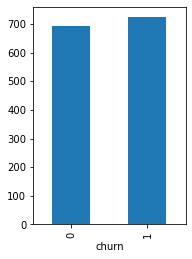

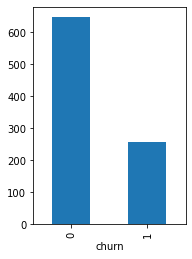

In [39]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_rech_amt'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['total_rech_amt_8'].mean()
barplot2.plot.bar()
plt.show()

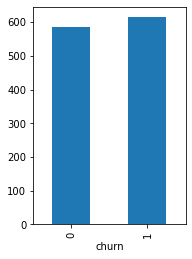

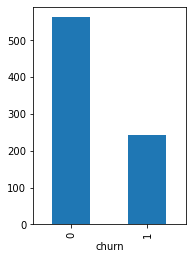

In [40]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_arpu'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['arpu_8'].mean()
barplot2.plot.bar()
plt.show()

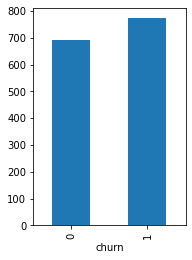

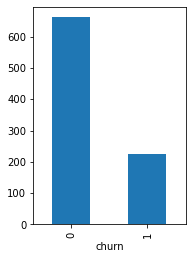

In [41]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_og_mou'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['total_og_mou_8'].mean()
barplot2.plot.bar()
plt.show()

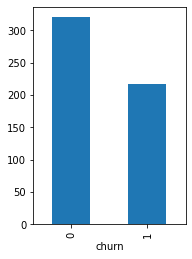

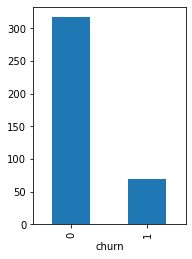

In [42]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_ic_mou'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['total_ic_mou_8'].mean()
barplot2.plot.bar()
plt.show()

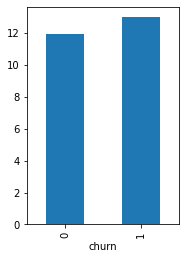

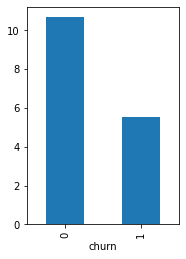

In [43]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_rech_num'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['total_rech_num_8'].mean()
barplot2.plot.bar()
plt.show()

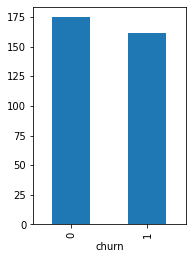

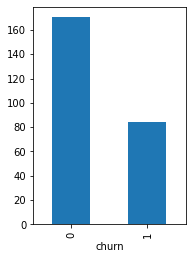

In [44]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_max_rech_amt'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['max_rech_amt_8'].mean()
barplot2.plot.bar()
plt.show()

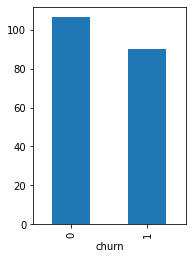

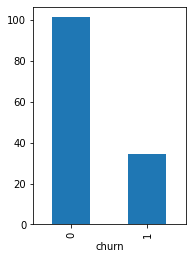

In [45]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_last_day_rch_amt'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['last_day_rch_amt_8'].mean()
barplot2.plot.bar()
plt.show()

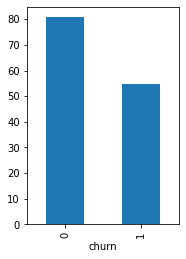

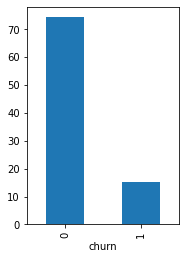

In [46]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_vol_2g'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['vol_2g_mb_8'].mean()
barplot2.plot.bar()
plt.show()

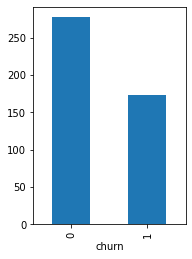

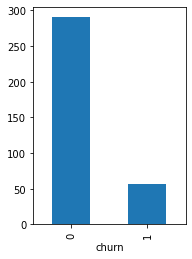

In [47]:
plt.subplot(1, 2, 1)
barplot=main_data.groupby(['churn'])['avg_vol_3g'].mean()
barplot.plot.bar()
plt.show()
plt.subplot(1, 2, 2)
barplot2=main_data.groupby(['churn'])['vol_3g_mb_8'].mean()
barplot2.plot.bar()
plt.show()

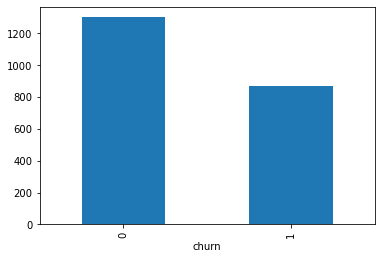

In [48]:
barplot=main_data.groupby(['churn'])['aon'].mean()
barplot.plot.bar()
plt.show()

In [49]:
#BUILDING MODELS USING DECISION TREE

In [50]:
md=main_data.copy()
md.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,avg_vol_3g,actiongoodchange_avg_rech_amt,actiongoodchange_avg_arpu,actiongoodchange_avg_og_mou,actiongoodchange_avg_ic_mou,actiongoodchange_avg_rech_num,actiongoodchange_avg_max_rech_amt,actiongoodchange_last_day_rech_amt,actiongoodchange_avg_vol_2g,actiongoodchange_avg_vol_3g
7,7000701601,0.0,0.0,0.0,3171.480,57.84,54.68,52.29,453.43,567.16,...,0.000,2453.0,1961.9650,-198.225,-163.510,2.0,395.0,779.0,0.00,0.000
8,7001524846,0.0,0.0,0.0,137.362,413.69,351.03,35.08,94.66,80.63,...,375.475,-399.0,-298.1100,-298.450,-49.635,-6.0,-92.0,-15.0,-177.97,-363.535
13,7002191713,0.0,0.0,0.0,593.260,501.76,108.39,534.24,413.31,119.28,...,0.000,337.0,244.0015,465.510,573.935,6.0,20.0,-80.0,0.02,0.000
16,7000875565,0.0,0.0,0.0,187.894,50.51,74.01,70.61,296.29,229.74,...,0.000,-299.0,-177.5280,-83.030,-78.750,-6.0,20.0,30.0,0.00,0.000
17,7000187447,0.0,0.0,0.0,25.499,1185.91,9.28,7.79,61.64,0.00,...,0.000,-378.0,-328.9950,-625.170,-47.095,-6.5,-25.0,-15.0,0.00,0.000


In [51]:
#Train test split
X = md.drop(['churn','mobile_number'],axis=1)
y= md['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((21007, 133), (9004, 133))

In [52]:
!pip install imbalanced-learn

In [53]:
#Using Smote to overcome class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [54]:
#Scaling the train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_score_

0.9108515083819739

In [57]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [58]:
new_model = DecisionTreeClassifier(random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=5)

new_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [59]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = new_model.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[18545,   642],
       [  541, 18646]], dtype=int64)

In [60]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensitivity of the model

sen=TP / float(TP+FN)
print("Sensitivity= ",sen)

Sensitivity=  0.9718038255068536


In [61]:
# Specificity of model

spec=TN / float(TN+FP)
print("Specificity= ",spec)

Specificity=  0.9665398446865064


In [62]:
#accuracy of the model
acc=accuracy_score(y_train, y_train_pred)
print("accuracy= ", acc)

accuracy=  0.96917183509668


In [63]:
#Now on to test set
y_test_pred = new_model.predict(X_test)
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[7447,  784],
       [ 257,  516]], dtype=int64)

In [64]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensitivity of the model

sen=TP / float(TP+FN)
print("Sensitivity= ",sen)

Sensitivity=  0.6675291073738681


In [65]:
# Specificity of model

spec=TN / float(TN+FP)
print("Specificity= ",spec)

Specificity=  0.9047503341027822


In [66]:
#accuracy of the model
acc=accuracy_score(y_test, y_test_pred)
print("accuracy= ", acc)

accuracy=  0.8843847179031542


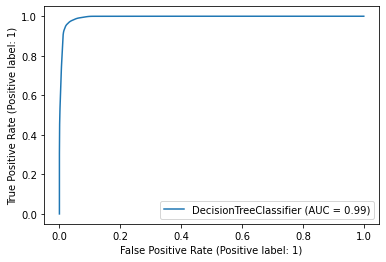

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(new_model, X_train, y_train)
plt.show()

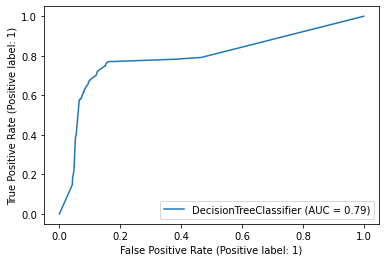

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(new_model, X_test, y_test)
plt.show()

In [69]:
#Now on to Random forest model
newmd=main_data.copy()
newmd.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,avg_vol_3g,actiongoodchange_avg_rech_amt,actiongoodchange_avg_arpu,actiongoodchange_avg_og_mou,actiongoodchange_avg_ic_mou,actiongoodchange_avg_rech_num,actiongoodchange_avg_max_rech_amt,actiongoodchange_last_day_rech_amt,actiongoodchange_avg_vol_2g,actiongoodchange_avg_vol_3g
7,7000701601,0.0,0.0,0.0,3171.480,57.84,54.68,52.29,453.43,567.16,...,0.000,2453.0,1961.9650,-198.225,-163.510,2.0,395.0,779.0,0.00,0.000
8,7001524846,0.0,0.0,0.0,137.362,413.69,351.03,35.08,94.66,80.63,...,375.475,-399.0,-298.1100,-298.450,-49.635,-6.0,-92.0,-15.0,-177.97,-363.535
13,7002191713,0.0,0.0,0.0,593.260,501.76,108.39,534.24,413.31,119.28,...,0.000,337.0,244.0015,465.510,573.935,6.0,20.0,-80.0,0.02,0.000
16,7000875565,0.0,0.0,0.0,187.894,50.51,74.01,70.61,296.29,229.74,...,0.000,-299.0,-177.5280,-83.030,-78.750,-6.0,20.0,30.0,0.00,0.000
17,7000187447,0.0,0.0,0.0,25.499,1185.91,9.28,7.79,61.64,0.00,...,0.000,-378.0,-328.9950,-625.170,-47.095,-6.5,-25.0,-15.0,0.00,0.000


In [70]:
#Train-Test Split
X = newmd.drop(['churn','mobile_number'],axis=1)
y= newmd['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((21007, 133), (9004, 133))

In [71]:
#SMOTE to fix imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [73]:
grid_search.best_score_

0.9462920546240319

In [74]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [75]:
new_mod=RandomForestClassifier(bootstrap=True,
          max_depth=20,
          min_samples_leaf=5,
          n_estimators=100,
           n_jobs=-1,
          random_state=42)
new_mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [76]:
y_train_pred = new_mod.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[18615,   572],
       [  190, 18997]], dtype=int64)

In [77]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensitivity of the model

sen=TP / float(TP+FN)
print("Sensitivity= ",sen)

Sensitivity=  0.9900974618231094


In [78]:
# Specificity of model

spec=TN / float(TN+FP)
print("Specificity= ",spec)

Specificity=  0.9701881482253609


In [79]:
#accuracy of the model
acc=accuracy_score(y_train, y_train_pred)
print("accuracy= ", acc)

accuracy=  0.9801428050242351


In [80]:
y_test_pred = new_mod.predict(X_test)
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[7745,  486],
       [ 207,  566]], dtype=int64)

In [81]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensitivity of the model

sen=TP / float(TP+FN)
print("Sensitivity= ",sen)

Sensitivity=  0.7322121604139715


In [82]:
# Specificity of model

spec=TN / float(TN+FP)
print("Specificity= ",spec)

Specificity=  0.9409549264973879


In [83]:
#accuracy of the model
acc=accuracy_score(y_test, y_test_pred)
print("accuracy= ", acc)

accuracy=  0.9230342070191027


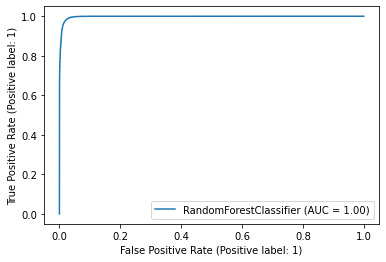

In [84]:
plot_roc_curve(new_mod, X_train, y_train)
plt.show()

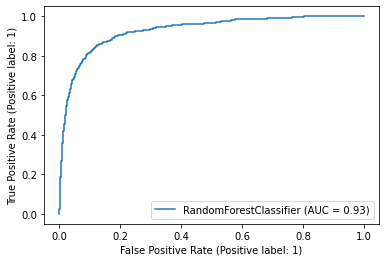

In [85]:
plot_roc_curve(new_mod, X_test, y_test)
plt.show()

In [86]:
#Logistic Regression Model
lrd=main_data.copy()
lrd.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,avg_vol_3g,actiongoodchange_avg_rech_amt,actiongoodchange_avg_arpu,actiongoodchange_avg_og_mou,actiongoodchange_avg_ic_mou,actiongoodchange_avg_rech_num,actiongoodchange_avg_max_rech_amt,actiongoodchange_last_day_rech_amt,actiongoodchange_avg_vol_2g,actiongoodchange_avg_vol_3g
7,7000701601,0.0,0.0,0.0,3171.480,57.84,54.68,52.29,453.43,567.16,...,0.000,2453.0,1961.9650,-198.225,-163.510,2.0,395.0,779.0,0.00,0.000
8,7001524846,0.0,0.0,0.0,137.362,413.69,351.03,35.08,94.66,80.63,...,375.475,-399.0,-298.1100,-298.450,-49.635,-6.0,-92.0,-15.0,-177.97,-363.535
13,7002191713,0.0,0.0,0.0,593.260,501.76,108.39,534.24,413.31,119.28,...,0.000,337.0,244.0015,465.510,573.935,6.0,20.0,-80.0,0.02,0.000
16,7000875565,0.0,0.0,0.0,187.894,50.51,74.01,70.61,296.29,229.74,...,0.000,-299.0,-177.5280,-83.030,-78.750,-6.0,20.0,30.0,0.00,0.000
17,7000187447,0.0,0.0,0.0,25.499,1185.91,9.28,7.79,61.64,0.00,...,0.000,-378.0,-328.9950,-625.170,-47.095,-6.5,-25.0,-15.0,0.00,0.000


In [87]:
X = lrd.drop(['churn','mobile_number'],axis=1)
y= lrd['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((21007, 133), (9004, 133))

In [88]:
smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [89]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [91]:
#Doing the recursive feature elimination
from sklearn.feature_selection import RFE
rfe=RFE(logreg,step=15)
rfe=rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [92]:
X_train.shape

(38374, 133)

In [93]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 6),
 ('std_og_t2o_mou', False, 6),
 ('loc_ic_t2o_mou', False, 6),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 4),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 3),
 ('roam_ic_mou_7', False, 3),
 ('roam_ic_mou_8', False, 4),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 5),
 ('loc_og_t2f_mou_6', False, 5),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_6', False, 4),
 ('loc_og_t2c_mou_7', False, 5),
 ('loc_og_t2c_mou_8', False, 5),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 2),


In [95]:
colmns=X_train.columns[rfe.support_]
colmns

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'avg_rech_amt', 'avg_arpu', 'avg_og_mou', 'avg_re

In [96]:
#Building logistic regression models
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[colmns])
logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38308
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Mar 2023   Deviance:                   2.3772e+05
Time:                        22:39:25   Pearson chi2:                 1.16e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1.015e+15   3.43e+05   2.96e+09      0.000    1.01e+15    1.01e+15
arpu_8                              3.483e+13   1.17e+06   2.98e+07      0.000    3.48e+13    3.48e+13
onnet_mou_6                        -9.696e+13   5.02e+06  -1.93e+07      0.000    -9.7e+13    -9.7e+13
onnet_mou_8                         3.247e+13   7.93e+05   4.09e+07      0.000    3.25e+13    3.25e+13
offnet_mou_7                       -7.465e+13   5.44e+06  -1.37e+07      0.000   -7.47e+13   -7.47e+13
roam_og_mou_6                       4.357e+12   7.41e+05   5.88e+06      0.000    4.36e+12    4.36e+12
roam_og_mou_7                       3.529e+13   8.44e+05   4.18e+07      0.000    3.53e+13    3.53e+13
loc_og_t2t_mou_6                     2.01e+14   7.55e+06   2.66e+07      0.000    2.01e+14    2.01e+14
loc_og_t2t_mou_7                     9.01e+17   1.21e+10   7.47e+07      0.000    9.01e+17    9.01e+17
loc_og_t2t_mou_8                    1.722e+13   9.21e+05   1.87e+07      0.000    1.72e+13    1.72e+13
loc_og_t2m_mou_6                     1.28e+14   7.63e+06   1.68e+07      0.000    1.28e+14    1.28e+14
loc_og_t2m_mou_7                     9.71e+17    1.3e+10   7.47e+07      0.000    9.71e+17    9.71e+17
loc_og_t2f_mou_7                    9.373e+16   1.26e+09   7.47e+07      0.000    9.37e+16    9.37e+16
loc_og_mou_6                       -2.147e+14   1.19e+07   -1.8e+07      0.000   -2.15e+14   -2.15e+14
loc_og_mou_7                       -1.466e+18   1.96e+10  -7.47e+07      0.000   -1.47e+18   -1.47e+18
loc_og_mou_8                       -8.998e+13   1.03e+06  -8.71e+07      0.000      -9e+13      -9e+13
std_og_t2t_mou_6                    1.755e+14    4.7e+06   3.74e+07      0.000    1.76e+14    1.76e+14
std_og_t2m_mou_7                    1.457e+14   5.11e+06   2.85e+07      0.000    1.46e+14    1.46e+14
std_og_mou_6                       -1.552e+13   7.32e+06  -2.12e+06      0.000   -1.55e+13   -1.55e+13
std_og_mou_7                       -5.395e+13   7.28e+06  -7.41e+06      0.000    -5.4e+13    -5.4e+13
isd_og_mou_6                         5.62e+13   7.91e+05    7.1e+07      0.000    5.62e+13    5.62e+13
isd_og_mou_8                       -4.785e+13   6.61e+05  -7.24e+07      0.000   -4.79e+13   -4.79e+13
og_others_7                         2.156e+13   4.94e+05   4.37e+07      0.000    2.16e+13    2.16e+13
total_og_mou_8                     -1.298e+14   9.07e+05  -1.43e+08      0.000    -1.3e+14    -1.3e+14
loc_ic_t2m_mou_7                    8.721e+13   7.91e+05    1.1e+08      0.000    8.72e+13    8.72e+13
loc_ic_t2m_mou_8                   -2.002e+14    9.5e+05  -2.11e+08      0.000      -2e+14      -2e+14
loc_ic_mou_8                       -1.856e+14   1.37e+06  -1.36e+08      0.000   -1.86e+14   -1.

In [97]:
#checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,arpu_8,inf
51,avg_arpu,inf
59,actiongoodchange_avg_arpu,inf
13,loc_og_mou_7,3.286229e+09
10,loc_og_t2m_mou_7,1.440784e+09
...,...,...
64,actiongoodchange_avg_vol_2g,1.663333e+00
48,aon,1.210342e+00
29,std_ic_t2f_mou_8,1.093901e+00
32,spl_ic_mou_8,1.046120e+00


In [98]:
colmns=colmns.drop('actiongoodchange_avg_arpu')

In [99]:
#Creating a second regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38308
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4634.7
Date:                Tue, 14 Mar 2023   Deviance:                       9269.5
Time:                        22:39:45   Pearson chi2:                 1.55e+13
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6817
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3.829e+04   1.95e+05      0.197      0.844   -3.43e+05     4.2e+05
arpu_8                                -0.4923      0.136     -3.617      0.000      -0.759      -0.226
onnet_mou_6                           -0.5184      0.381     -1.361      0.174      -1.265       0.228
onnet_mou_8                            0.1638      0.084      1.954      0.051      -0.000       0.328
offnet_mou_7                           0.2170      0.409      0.530      0.596      -0.585       1.019
roam_og_mou_6                          0.1198      0.058      2.072      0.038       0.006       0.233
roam_og_mou_7                          0.0474      0.062      0.764      0.445      -0.074       0.169
loc_og_t2t_mou_6                       0.8904      0.701      1.270      0.204      -0.483       2.264
loc_og_t2t_mou_7                    3761.6933    929.944      4.045      0.000    1939.036    5584.351
loc_og_t2t_mou_8                       0.1022      0.159      0.644      0.520      -0.209       0.413
loc_og_t2m_mou_6                       0.4870      0.721      0.675      0.499      -0.926       1.900
loc_og_t2m_mou_7                    4053.6462   1002.153      4.045      0.000    2089.463    6017.830
loc_og_t2f_mou_7                     391.3048     96.748      4.045      0.000     201.683     580.927
loc_og_mou_6                          -0.1376      1.117     -0.123      0.902      -2.327       2.052
loc_og_mou_7                       -6121.6389   1513.505     -4.045      0.000   -9088.054   -3155.224
loc_og_mou_8                          -0.5301      0.183     -2.894      0.004      -0.889      -0.171
std_og_t2t_mou_6                       0.3966      0.355      1.116      0.264      -0.300       1.093
std_og_t2m_mou_7                      -0.1290      0.384     -0.335      0.737      -0.883       0.625
std_og_mou_6                           1.5172      0.587      2.586      0.010       0.367       2.667
std_og_mou_7                           1.4151      0.583      2.428      0.015       0.273       2.557
isd_og_mou_6                           0.1933      0.091      2.121      0.034       0.015       0.372
isd_og_mou_8                          -0.0775      0.076     -1.018      0.309      -0.227       0.072
og_others_7                            0.0957      0.047      2.029      0.042       0.003       0.188
total_og_mou_8                        -0.7401      0.100     -7.419      0.000      -0.936      -0.545
loc_ic_t2m_mou_7                       0.4195      0.090      4.684      0.000       0.244       0.595
loc_ic_t2m_mou_8                      -1.0143      0.246     -4.124      0.000      -1.496      -0.532
loc_ic_mou_8                          -1.0395      0.266     -3.902      0.000      -1.562      

In [100]:
#Creating droplists to eliminate high p-values over 0.05
neodroplist=['actiongoodchange_avg_rech_amt','actiongoodchange_last_day_rech_amt','actiongoodchange_avg_rech_num','actiongoodchange_avg_rech_amt']

In [101]:
colmns=colmns.drop(neodroplist)

In [102]:
#Creating a third regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38311
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7346.7
Date:                Tue, 14 Mar 2023   Deviance:                       14693.
Time:                        22:39:50   Pearson chi2:                 1.38e+15
No. Iterations:                    86   Pseudo R-squ. (CS):             0.6334
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              8527.6701   1.53e+05      0.056      0.956   -2.91e+05    3.08e+05
arpu_8                               -0.6980      0.118     -5.891      0.000      -0.930      -0.466
onnet_mou_6                          -0.4924      0.310     -1.588      0.112      -1.100       0.115
onnet_mou_8                           0.2502      0.060      4.172      0.000       0.133       0.368
offnet_mou_7                          0.5151      0.367      1.405      0.160      -0.204       1.234
roam_og_mou_6                         0.1224      0.049      2.493      0.013       0.026       0.219
roam_og_mou_7                        -0.0444      0.054     -0.818      0.413      -0.151       0.062
loc_og_t2t_mou_6                      0.0957      0.597      0.160      0.873      -1.074       1.265
loc_og_t2t_mou_7                   4188.5323    767.181      5.460      0.000    2684.885    5692.179
loc_og_t2t_mou_8                      0.0617      0.132      0.467      0.641      -0.198       0.321
loc_og_t2m_mou_6                     -0.3298      0.609     -0.541      0.588      -1.524       0.864
loc_og_t2m_mou_7                   4513.4967    826.751      5.459      0.000    2893.094    6133.899
loc_og_t2f_mou_7                    435.6316     79.815      5.458      0.000     279.197     592.066
loc_og_mou_6                          1.4290      0.947      1.510      0.131      -0.426       3.284
loc_og_mou_7                      -6815.9369   1248.601     -5.459      0.000   -9263.150   -4368.723
loc_og_mou_8                         -0.5501      0.141     -3.915      0.000      -0.826      -0.275
std_og_t2t_mou_6                      0.4078      0.290      1.408      0.159      -0.160       0.975
std_og_t2m_mou_7                     -0.3000      0.344     -0.872      0.383      -0.974       0.374
std_og_mou_6                          2.3656      0.513      4.614      0.000       1.361       3.370
std_og_mou_7                          2.2528      0.509      4.422      0.000       1.254       3.251
isd_og_mou_6                          0.2239      0.083      2.702      0.007       0.061       0.386
isd_og_mou_8                         -0.1874      0.090     -2.092      0.036      -0.363      -0.012
og_others_7                           0.1060      0.043      2.492      0.013       0.023       0.189
total_og_mou_8                       -0.7121      0.075     -9.485      0.000      -0.859      -0.565
loc_ic_t2m_mou_7                      0.2994      0.079      3.781      0.000       0.144       0.455
loc_ic_t2m_mou_8                     -0.3769      0.191     -1.969      0.049      -0.752      -0.002
loc_ic_mou_8                         -0.8200      0.243     -3.380      0.001      -1.296      -0.344
std_ic_t2t_mou_7       

In [103]:
anotherdroplist=['actiongoodchange_avg_max_rech_amt','std_og_t2m_mou_7','std_og_t2t_mou_6','loc_og_mou_6','loc_og_t2m_mou_6',
             'loc_og_t2t_mou_8','loc_og_t2t_mou_6','roam_og_mou_7','offnet_mou_7','onnet_mou_6']

In [104]:
colmns=colmns.drop(anotherdroplist)

In [105]:
#Creating a 4th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38321
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13815.
Date:                Tue, 14 Mar 2023   Deviance:                       27629.
Time:                        22:39:51   Pearson chi2:                 1.22e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4864
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5531      0.022    -25.509      0.000      -0.596      -0.511
arpu_8                          0.2046      0.082      2.496      0.013       0.044       0.365
onnet_mou_8                     0.0516      0.025      2.053      0.040       0.002       0.101
roam_og_mou_6                   0.1636      0.021      7.776      0.000       0.122       0.205
loc_og_t2t_mou_7             4317.7544    556.081      7.765      0.000    3227.855    5407.653
loc_og_t2m_mou_7             4652.6283    599.261      7.764      0.000    3478.098    5827.159
loc_og_t2f_mou_7              448.9609     57.853      7.760      0.000     335.571     562.351
loc_og_mou_7                -7026.6145    905.029     -7.764      0.000   -8800.438   -5252.791
loc_og_mou_8                   -0.6147      0.060    -10.306      0.000      -0.732      -0.498
std_og_mou_6                    0.1636      0.059      2.759      0.006       0.047       0.280
std_og_mou_7                    0.5173      0.060      8.661      0.000       0.400       0.634
isd_og_mou_6                    0.2111      0.064      3.280      0.001       0.085       0.337
isd_og_mou_8                   -0.2929      0.064     -4.579      0.000      -0.418      -0.168
og_others_7                     0.1224      0.030      4.141      0.000       0.064       0.180
total_og_mou_8                 -0.7533      0.044    -16.939      0.000      -0.840      -0.666
loc_ic_t2m_mou_7                0.4657      0.054      8.627      0.000       0.360       0.571
loc_ic_t2m_mou_8               -0.7694      0.095     -8.119      0.000      -0.955      -0.584
loc_ic_mou_8                   -0.4194      0.111     -3.793      0.000      -0.636      -0.203
std_ic_t2t_mou_7                0.1294      0.027      4.824      0.000       0.077       0.182
std_ic_t2t_mou_8               -0.3421      0.050     -6.821      0.000      -0.440      -0.244
std_ic_t2m_mou_7               -0.1463      0.023     -6.347      0.000      -0.191      -0.101
std_ic_t2f_mou_8               -0.1879      0.051     -3.660      0.000      -0.289      -0.087
total_ic_mou_8                 -0.2472      0.092     -2.680      0.007      -0.428      -0.066
spl_ic_mou_7                   -0.1945      0.033     -5.934      0.000      -0.259      -0.130
spl_ic_mou_8                   -0.3473      0.025    -13.733      0.000      -0.397      -0.298
total_rech_num_8               -0.7644      0.037    -20.786      0.000      -0.836      -0.692
total_rech_amt_8                0.2453      0.088      2.794      0.005       0.073       0.417
max_rech_amt_8                 -0.0495      0.034     -1.442      0.149      -0.117       0.018
last_day_rch_amt_8             -0.5038      0.027    -18.923      0.000      -0.556      -0.452
monthly_2g_

In [106]:
colmns=colmns.drop('avg_rech_amt')

In [107]:
#creating a 5th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38322
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13816.
Date:                Tue, 14 Mar 2023   Deviance:                       27632.
Time:                        22:39:51   Pearson chi2:                 1.36e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4864
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5535      0.022    -25.526      0.000      -0.596      -0.511
arpu_8                          0.1741      0.080      2.189      0.029       0.018       0.330
onnet_mou_8                     0.0516      0.025      2.054      0.040       0.002       0.101
roam_og_mou_6                   0.1604      0.021      7.636      0.000       0.119       0.202
loc_og_t2t_mou_7             4315.5071    555.995      7.762      0.000    3225.778    5405.236
loc_og_t2m_mou_7             4650.2061    599.168      7.761      0.000    3475.859    5824.554
loc_og_t2f_mou_7              448.7300     57.844      7.758      0.000     335.358     562.102
loc_og_mou_7                -7022.9590    904.888     -7.761      0.000   -8796.506   -5249.412
loc_og_mou_8                   -0.6158      0.060    -10.315      0.000      -0.733      -0.499
std_og_mou_6                    0.1618      0.059      2.727      0.006       0.045       0.278
std_og_mou_7                    0.5136      0.060      8.600      0.000       0.397       0.631
isd_og_mou_6                    0.2056      0.065      3.180      0.001       0.079       0.332
isd_og_mou_8                   -0.2981      0.065     -4.614      0.000      -0.425      -0.171
og_others_7                     0.1235      0.029      4.221      0.000       0.066       0.181
total_og_mou_8                 -0.7511      0.044    -16.891      0.000      -0.838      -0.664
loc_ic_t2m_mou_7                0.4661      0.054      8.626      0.000       0.360       0.572
loc_ic_t2m_mou_8               -0.7680      0.095     -8.095      0.000      -0.954      -0.582
loc_ic_mou_8                   -0.4215      0.111     -3.807      0.000      -0.639      -0.204
std_ic_t2t_mou_7                0.1282      0.027      4.786      0.000       0.076       0.181
std_ic_t2t_mou_8               -0.3404      0.050     -6.790      0.000      -0.439      -0.242
std_ic_t2m_mou_7               -0.1452      0.023     -6.296      0.000      -0.190      -0.100
std_ic_t2f_mou_8               -0.1849      0.051     -3.620      0.000      -0.285      -0.085
total_ic_mou_8                 -0.2469      0.092     -2.673      0.008      -0.428      -0.066
spl_ic_mou_7                   -0.1941      0.033     -5.922      0.000      -0.258      -0.130
spl_ic_mou_8                   -0.3469      0.025    -13.729      0.000      -0.396      -0.297
total_rech_num_8               -0.7582      0.037    -20.747      0.000      -0.830      -0.687
total_rech_amt_8                0.2626      0.087      3.005      0.003       0.091       0.434
max_rech_amt_8                 -0.0428      0.034     -1.258      0.209      -0.110       0.024
last_day_rch_amt_8             -0.5035      0.027    -18.898      0.000      -0.556      -0.451
monthly_2g_

In [108]:
colmns=colmns.drop('max_rech_amt_8')

In [109]:
#creating a 6th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38323
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13817.
Date:                Tue, 14 Mar 2023   Deviance:                       27633.
Time:                        22:39:52   Pearson chi2:                 1.51e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4863
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5569      0.022    -25.863      0.000      -0.599      -0.515
arpu_8                          0.2019      0.076      2.647      0.008       0.052       0.351
onnet_mou_8                     0.0526      0.025      2.091      0.037       0.003       0.102
roam_og_mou_6                   0.1615      0.021      7.691      0.000       0.120       0.203
loc_og_t2t_mou_7             4340.8143    555.698      7.811      0.000    3251.666    5429.963
loc_og_t2m_mou_7             4677.4786    598.849      7.811      0.000    3503.757    5851.200
loc_og_t2f_mou_7              451.3607     57.813      7.807      0.000     338.049     564.673
loc_og_mou_7                -7064.1482    904.405     -7.811      0.000   -8836.750   -5291.546
loc_og_mou_8                   -0.6176      0.060    -10.340      0.000      -0.735      -0.501
std_og_mou_6                    0.1605      0.059      2.704      0.007       0.044       0.277
std_og_mou_7                    0.5099      0.060      8.543      0.000       0.393       0.627
isd_og_mou_6                    0.2066      0.064      3.205      0.001       0.080       0.333
isd_og_mou_8                   -0.2927      0.064     -4.569      0.000      -0.418      -0.167
og_others_7                     0.1238      0.029      4.229      0.000       0.066       0.181
total_og_mou_8                 -0.7444      0.044    -16.857      0.000      -0.831      -0.658
loc_ic_t2m_mou_7                0.4668      0.054      8.638      0.000       0.361       0.573
loc_ic_t2m_mou_8               -0.7709      0.095     -8.124      0.000      -0.957      -0.585
loc_ic_mou_8                   -0.4191      0.111     -3.780      0.000      -0.636      -0.202
std_ic_t2t_mou_7                0.1282      0.027      4.790      0.000       0.076       0.181
std_ic_t2t_mou_8               -0.3413      0.050     -6.801      0.000      -0.440      -0.243
std_ic_t2m_mou_7               -0.1454      0.023     -6.301      0.000      -0.191      -0.100
std_ic_t2f_mou_8               -0.1854      0.051     -3.626      0.000      -0.286      -0.085
total_ic_mou_8                 -0.2502      0.093     -2.704      0.007      -0.432      -0.069
spl_ic_mou_7                   -0.1942      0.033     -5.923      0.000      -0.258      -0.130
spl_ic_mou_8                   -0.3477      0.025    -13.763      0.000      -0.397      -0.298
total_rech_num_8               -0.7501      0.036    -20.868      0.000      -0.821      -0.680
total_rech_amt_8                0.2035      0.074      2.764      0.006       0.059       0.348
last_day_rch_amt_8             -0.5108      0.026    -19.702      0.000      -0.562      -0.460
monthly_2g_6                   -0.5063      0.032    -15.770      0.000      -0.569      -0.443
monthly_2g_

In [110]:
#checking the vif of columns which seems to be fine this time
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,loc_og_mou_7,3.255364e+09
4,loc_og_t2m_mou_7,1.427268e+09
3,loc_og_t2t_mou_7,1.228999e+09
5,loc_og_t2f_mou_7,1.330106e+07
41,avg_og_mou,3.723587e+01
25,total_rech_amt_8,1.811733e+01
0,arpu_8,1.676094e+01
21,total_ic_mou_8,1.612004e+01
16,loc_ic_mou_8,1.584522e+01
8,std_og_mou_6,1.262681e+01


In [111]:
droplistx=['loc_og_mou_7','loc_og_t2m_mou_7','loc_og_t2t_mou_7','loc_og_t2f_mou_7']
colmns=colmns.drop(droplistx)

In [112]:
#creating a 7th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38327
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13938.
Date:                Tue, 14 Mar 2023   Deviance:                       27876.
Time:                        22:39:59   Pearson chi2:                 3.30e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4831
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5480      0.021    -25.733      0.000      -0.590      -0.506
arpu_8                          0.1121      0.074      1.509      0.131      -0.033       0.258
onnet_mou_8                     0.0979      0.025      3.912      0.000       0.049       0.147
roam_og_mou_6                   0.1948      0.021      9.358      0.000       0.154       0.236
loc_og_mou_8                   -0.5093      0.054     -9.450      0.000      -0.615      -0.404
std_og_mou_6                   -0.0319      0.044     -0.717      0.474      -0.119       0.055
std_og_mou_7                    0.3012      0.049      6.141      0.000       0.205       0.397
isd_og_mou_6                    0.2165      0.063      3.417      0.001       0.092       0.341
isd_og_mou_8                   -0.2754      0.063     -4.399      0.000      -0.398      -0.153
og_others_7                     0.0260      0.031      0.851      0.395      -0.034       0.086
total_og_mou_8                 -0.7672      0.044    -17.311      0.000      -0.854      -0.680
loc_ic_t2m_mou_7                0.4139      0.051      8.131      0.000       0.314       0.514
loc_ic_t2m_mou_8               -0.8961      0.095     -9.430      0.000      -1.082      -0.710
loc_ic_mou_8                   -0.3609      0.112     -3.222      0.001      -0.580      -0.141
std_ic_t2t_mou_7                0.1152      0.026      4.437      0.000       0.064       0.166
std_ic_t2t_mou_8               -0.3168      0.050     -6.373      0.000      -0.414      -0.219
std_ic_t2m_mou_7               -0.1361      0.023     -5.905      0.000      -0.181      -0.091
std_ic_t2f_mou_8               -0.2169      0.052     -4.145      0.000      -0.319      -0.114
total_ic_mou_8                 -0.2711      0.093     -2.902      0.004      -0.454      -0.088
spl_ic_mou_7                   -0.1950      0.033     -5.973      0.000      -0.259      -0.131
spl_ic_mou_8                   -0.3515      0.025    -13.921      0.000      -0.401      -0.302
total_rech_num_8               -0.7326      0.036    -20.503      0.000      -0.803      -0.663
total_rech_amt_8                0.2588      0.072      3.589      0.000       0.117       0.400
last_day_rch_amt_8             -0.5165      0.026    -20.058      0.000      -0.567      -0.466
monthly_2g_6                   -0.5109      0.032    -15.968      0.000      -0.574      -0.448
monthly_2g_7                   -0.4364      0.031    -14.087      0.000      -0.497      -0.376
monthly_2g_8                   -0.5695      0.047    -12.086      0.000      -0.662      -0.477
sachet_2g_7                    -0.1480      0.024     -6.073      0.000      -0.196      -0.100
sachet_2g_8                    -0.4156      0.033    -12.644      0.000      -0.480      -0.351
monthly_3g_

In [113]:
droplistx=['std_og_mou_6','og_others_7']
colmns=colmns.drop(droplistx)

In [114]:
#creating a 8th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm8=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38329
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13939.
Date:                Tue, 14 Mar 2023   Deviance:                       27878.
Time:                        22:40:00   Pearson chi2:                 3.35e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4831
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5470      0.021    -25.778      0.000      -0.589      -0.505
arpu_8                          0.1131      0.074      1.524      0.128      -0.032       0.259
onnet_mou_8                     0.0978      0.025      3.908      0.000       0.049       0.147
roam_og_mou_6                   0.1948      0.021      9.361      0.000       0.154       0.236
loc_og_mou_8                   -0.4903      0.045    -10.802      0.000      -0.579      -0.401
std_og_mou_7                    0.3175      0.041      7.653      0.000       0.236       0.399
isd_og_mou_6                    0.2156      0.063      3.405      0.001       0.092       0.340
isd_og_mou_8                   -0.2743      0.063     -4.383      0.000      -0.397      -0.152
total_og_mou_8                 -0.7675      0.044    -17.321      0.000      -0.854      -0.681
loc_ic_t2m_mou_7                0.4185      0.050      8.293      0.000       0.320       0.517
loc_ic_t2m_mou_8               -0.9026      0.095     -9.550      0.000      -1.088      -0.717
loc_ic_mou_8                   -0.3563      0.112     -3.188      0.001      -0.575      -0.137
std_ic_t2t_mou_7                0.1146      0.026      4.422      0.000       0.064       0.165
std_ic_t2t_mou_8               -0.3164      0.050     -6.363      0.000      -0.414      -0.219
std_ic_t2m_mou_7               -0.1371      0.023     -5.972      0.000      -0.182      -0.092
std_ic_t2f_mou_8               -0.2144      0.052     -4.115      0.000      -0.316      -0.112
total_ic_mou_8                 -0.2713      0.093     -2.903      0.004      -0.455      -0.088
spl_ic_mou_7                   -0.1936      0.033     -5.940      0.000      -0.257      -0.130
spl_ic_mou_8                   -0.3518      0.025    -13.934      0.000      -0.401      -0.302
total_rech_num_8               -0.7329      0.036    -20.518      0.000      -0.803      -0.663
total_rech_amt_8                0.2567      0.072      3.562      0.000       0.115       0.398
last_day_rch_amt_8             -0.5161      0.026    -20.062      0.000      -0.567      -0.466
monthly_2g_6                   -0.5108      0.032    -15.968      0.000      -0.574      -0.448
monthly_2g_7                   -0.4361      0.031    -14.085      0.000      -0.497      -0.375
monthly_2g_8                   -0.5695      0.047    -12.086      0.000      -0.662      -0.477
sachet_2g_7                    -0.1471      0.024     -6.040      0.000      -0.195      -0.099
sachet_2g_8                    -0.4160      0.033    -12.655      0.000      -0.480      -0.352
monthly_3g_6                   -0.3326      0.029    -11.383      0.000      -0.390      -0.275
monthly_3g_7                   -0.3272      0.033    -10.040      0.000      -0.391      -0.263
monthly_3g_

In [115]:
droplistx=['avg_og_mou','arpu_8']
colmns=colmns.drop(droplistx)

In [116]:
#creating a 9th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logm9=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38331
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13940.
Date:                Tue, 14 Mar 2023   Deviance:                       27880.
Time:                        22:40:00   Pearson chi2:                 4.39e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4830
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5449      0.021    -25.748      0.000      -0.586      -0.503
onnet_mou_8                     0.0992      0.025      3.973      0.000       0.050       0.148
roam_og_mou_6                   0.1956      0.020      9.791      0.000       0.156       0.235
loc_og_mou_8                   -0.4815      0.044    -11.037      0.000      -0.567      -0.396
std_og_mou_7                    0.3229      0.031     10.418      0.000       0.262       0.384
isd_og_mou_6                    0.1999      0.061      3.262      0.001       0.080       0.320
isd_og_mou_8                   -0.2531      0.061     -4.183      0.000      -0.372      -0.135
total_og_mou_8                 -0.7550      0.043    -17.493      0.000      -0.840      -0.670
loc_ic_t2m_mou_7                0.4162      0.050      8.277      0.000       0.318       0.515
loc_ic_t2m_mou_8               -0.9006      0.094     -9.539      0.000      -1.086      -0.716
loc_ic_mou_8                   -0.3633      0.112     -3.254      0.001      -0.582      -0.144
std_ic_t2t_mou_7                0.1131      0.026      4.376      0.000       0.062       0.164
std_ic_t2t_mou_8               -0.3162      0.050     -6.362      0.000      -0.414      -0.219
std_ic_t2m_mou_7               -0.1376      0.023     -6.004      0.000      -0.182      -0.093
std_ic_t2f_mou_8               -0.2127      0.052     -4.094      0.000      -0.315      -0.111
total_ic_mou_8                 -0.2624      0.093     -2.814      0.005      -0.445      -0.080
spl_ic_mou_7                   -0.1938      0.033     -5.963      0.000      -0.258      -0.130
spl_ic_mou_8                   -0.3517      0.025    -13.933      0.000      -0.401      -0.302
total_rech_num_8               -0.7291      0.035    -20.615      0.000      -0.798      -0.660
total_rech_amt_8                0.3424      0.043      7.939      0.000       0.258       0.427
last_day_rch_amt_8             -0.5215      0.025    -20.525      0.000      -0.571      -0.472
monthly_2g_6                   -0.5117      0.032    -15.992      0.000      -0.574      -0.449
monthly_2g_7                   -0.4357      0.031    -14.077      0.000      -0.496      -0.375
monthly_2g_8                   -0.5684      0.047    -12.071      0.000      -0.661      -0.476
sachet_2g_7                    -0.1472      0.024     -6.056      0.000      -0.195      -0.100
sachet_2g_8                    -0.4166      0.033    -12.683      0.000      -0.481      -0.352
monthly_3g_6                   -0.3340      0.029    -11.468      0.000      -0.391      -0.277
monthly_3g_7                   -0.3268      0.033    -10.034      0.000      -0.391      -0.263
monthly_3g_8                   -0.4508      0.046     -9.699      0.000      -0.542      -0.360
sachet_3g_6

In [117]:
#checking the vif of column again
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
14,total_ic_mou_8,15.962623
9,loc_ic_mou_8,15.782855
8,loc_ic_t2m_mou_8,7.043438
6,total_og_mou_8,5.417056
18,total_rech_amt_8,5.098396
7,loc_ic_t2m_mou_7,4.618654
38,avg_vol_3g,3.857762
33,avg_arpu,3.654350
27,monthly_3g_8,3.371704
29,sachet_3g_7,3.305983


In [118]:
dropl=['loc_ic_mou_8','loc_ic_t2m_mou_8']
colmns=colmns.drop(dropl)

In [119]:
colmns=colmns.drop('loc_ic_t2m_mou_7')

In [120]:
#creating a 10th regression model
X_train_sm=sm.add_constant(X_train[colmns])
logmx=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logmx.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38334
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14025.
Date:                Tue, 14 Mar 2023   Deviance:                       28050.
Time:                        22:40:05   Pearson chi2:                 3.97e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4807
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5244      0.021    -25.102      0.000      -0.565      -0.483
onnet_mou_8                     0.0933      0.025      3.757      0.000       0.045       0.142
roam_og_mou_6                   0.1983      0.020      9.952      0.000       0.159       0.237
loc_og_mou_8                   -0.5804      0.043    -13.449      0.000      -0.665      -0.496
std_og_mou_7                    0.3368      0.031     10.977      0.000       0.277       0.397
isd_og_mou_6                    0.1918      0.061      3.137      0.002       0.072       0.312
isd_og_mou_8                   -0.2152      0.055     -3.902      0.000      -0.323      -0.107
total_og_mou_8                 -0.7581      0.043    -17.705      0.000      -0.842      -0.674
std_ic_t2t_mou_7                0.1053      0.027      3.924      0.000       0.053       0.158
std_ic_t2t_mou_8               -0.1572      0.048     -3.290      0.001      -0.251      -0.064
std_ic_t2m_mou_7               -0.0789      0.022     -3.512      0.000      -0.123      -0.035
std_ic_t2f_mou_8               -0.1670      0.051     -3.255      0.001      -0.267      -0.066
total_ic_mou_8                 -0.9676      0.044    -21.850      0.000      -1.054      -0.881
spl_ic_mou_7                   -0.1765      0.032     -5.487      0.000      -0.240      -0.113
spl_ic_mou_8                   -0.3519      0.025    -13.922      0.000      -0.401      -0.302
total_rech_num_8               -0.7386      0.035    -20.976      0.000      -0.808      -0.670
total_rech_amt_8                0.3525      0.042      8.329      0.000       0.270       0.435
last_day_rch_amt_8             -0.5273      0.025    -20.856      0.000      -0.577      -0.478
monthly_2g_6                   -0.5203      0.032    -16.283      0.000      -0.583      -0.458
monthly_2g_7                   -0.4299      0.031    -14.009      0.000      -0.490      -0.370
monthly_2g_8                   -0.5737      0.047    -12.163      0.000      -0.666      -0.481
sachet_2g_7                    -0.1435      0.024     -5.965      0.000      -0.191      -0.096
sachet_2g_8                    -0.4174      0.033    -12.809      0.000      -0.481      -0.354
monthly_3g_6                   -0.3382      0.029    -11.634      0.000      -0.395      -0.281
monthly_3g_7                   -0.3185      0.033     -9.791      0.000      -0.382      -0.255
monthly_3g_8                   -0.4535      0.046     -9.782      0.000      -0.544      -0.363
sachet_3g_6                    -0.2193      0.031     -7.022      0.000      -0.281      -0.158
sachet_3g_7                     0.1388      0.033      4.232      0.000       0.075       0.203
sachet_3g_8                    -0.2051      0.041     -5.059      0.000      -0.285      -0.126
aon        

In [121]:
#Ensuring that VIF values dont go significantly over 5 hence this model is safe for further evaluation
vif=pd.DataFrame()
vif['Features']=X_train[colmns].columns
vif['VIF']=[variance_inflation_factor(X_train[colmns].values, k) for k in range(X_train[colmns].shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,total_og_mou_8,5.370727
15,total_rech_amt_8,5.095471
35,avg_vol_3g,3.857131
30,avg_arpu,3.645268
24,monthly_3g_8,3.371641
26,sachet_3g_7,3.305677
14,total_rech_num_8,3.240155
4,isd_og_mou_6,3.193811
5,isd_og_mou_8,2.933569
38,actiongoodchange_avg_vol_3g,2.766699


In [122]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.018787
1    0.134599
2    0.017489
3    0.051060
4    0.000061
5    0.000927
6    0.476672
7    0.679119
8    0.000513
9    0.904250
dtype: float64

In [123]:
#making a dataframe with the converted and predicted values
y_train_final_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_final_pred.head()

,Converted,Converted_prob
0,0,0.018787
1,0,0.134599
2,0,0.017489
3,0,0.051060
4,0,0.000061


In [124]:
#making predicted label based on 0.5 cutoff point for converted prob
y_train_final_pred['predicted']=y_train_final_pred.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_final_pred.head()

,Converted,Converted_prob,predicted
0,0,0.018787,0
1,0,0.134599,0
2,0,0.017489,0
3,0,0.051060,0
4,0,0.000061,0


In [125]:
#creating a confusion matrix
from sklearn import metrics
conf=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.predicted)
print(conf)

[[15888  3299]
 [ 2476 16711]]


In [126]:
#accuracy score
print(metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.predicted))

0.8495074790222547


In [127]:
TP=conf[1,1] #True Positive 
TN=conf[0,0] #True Negatives
FP=conf[0,1] #False Positives
FN=conf[1,0] #False Negatives

In [128]:
TP/float(TP+FN) #Sensitivity

0.8709542919685204

In [129]:
TN/float(TN+FP) #Specificity

0.8280606660759889

In [130]:
print(FP/float(TN+FP)) #False Positive rate

0.17193933392401106


In [131]:
print(TP/float(TP+FP)) #Positive predictive value

0.8351324337831084


In [132]:
print(TN/float(TN+FN)) #Negative Predicitive Value

0.8651709867131344


In [133]:
def draw_roccurvve( actual, probs ):
    fpr, tpr, thresholds=metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score=metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/[1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_prob,drop_intermediate = False)

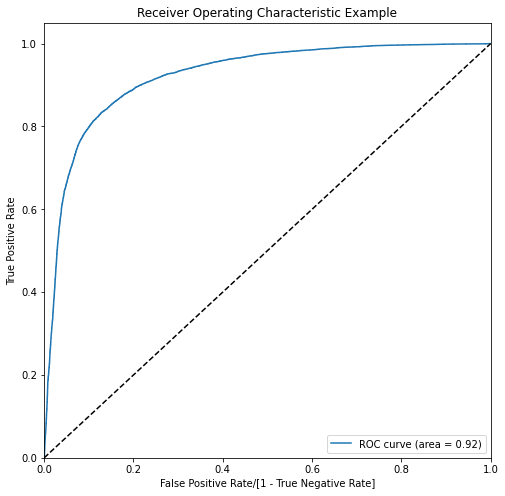

In [135]:
draw_roccurvve(y_train_final_pred.Converted,y_train_final_pred.Converted_prob)

In [136]:
#finding the optimal cutoff point
values = [float(i)/10 for i in range(10)]
for j in values:
    y_train_final_pred[j]= y_train_final_pred.Converted_prob.map(lambda i: 1 if i > j else 0)
y_train_final_pred.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018787,0,1,0,0,0,0,0,0,0,0,0
1,0,0.134599,0,1,1,0,0,0,0,0,0,0,0
2,0,0.017489,0,1,0,0,0,0,0,0,0,0,0
3,0,0.051060,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000061,0,1,0,0,0,0,0,0,0,0,0


In [137]:
cutoffs = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # True Positive 
# TN = confusion[0,0] # True Negatives
# FP = confusion[0,1] # False Positives
# FN = confusion[1,0] # False Negatives
val = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for x in val:
    conmat=metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred[x] )
    total=sum(sum(conmat))
    Accuracy = (conmat[0,0]+conmat[1,1])/total  
    Specificity=conmat[0,0]/(conmat[0,0]+conmat[0,1])
    Sensitivity=conmat[1,1]/(conmat[1,0]+conmat[1,1])
    cutoffs.loc[x] =[ x ,Accuracy,Sensitivity,Specificity]
print(cutoffs)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.730859     0.977850     0.483869
0.2          0.2  0.783473     0.956481     0.610465
0.3          0.3  0.815396     0.934278     0.696513
0.4          0.4  0.837312     0.908167     0.766456
0.5          0.5  0.849507     0.870954     0.828061
0.6          0.6  0.851618     0.824673     0.878564
0.7          0.7  0.841742     0.763069     0.920415
0.8          0.8  0.803982     0.656486     0.951478
0.9          0.9  0.660786     0.340856     0.980716


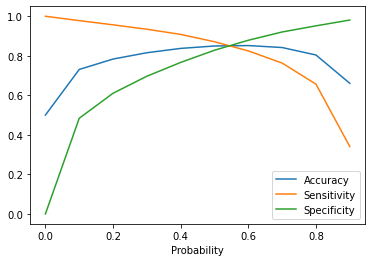

In [138]:
cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [139]:
#The actual cutoff point is very much in the middle of 0.4 and 0.6 hence the original value of 0.5 will suffice

In [140]:
#precision and recall score using sklearn
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_final_pred.Converted , y_train_final_pred.predicted)

0.8351324337831084

In [141]:
recall_score(y_train_final_pred.Converted , y_train_final_pred.predicted)

0.8709542919685204

In [142]:
from sklearn.metrics import precision_recall_curve
y_train_final_pred.Converted, y_train_final_pred.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38369    1
 38370    1
 38371    1
 38372    1
 38373    1
 Name: Converted, Length: 38374, dtype: category
 Categories (2, int64): [0, 1],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38369    1
 38370    0
 38371    1
 38372    1
 38373    1
 Name: predicted, Length: 38374, dtype: int64)

In [143]:
prec, recall, threshold = precision_recall_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_prob)

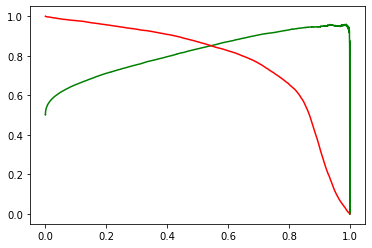

In [144]:
#plotting the graph between precision and recall tradeoffs which intersect at around 0.55
plt.plot(threshold, prec[:-1], "g-")
plt.plot(threshold, recall[:-1], "r-")
plt.show()

In [145]:
#Now on to test set

In [146]:
X_test=X_test[colmns]
X_test.head()

,onnet_mou_8,roam_og_mou_6,loc_og_mou_8,std_og_mou_7,isd_og_mou_6,isd_og_mou_8,total_og_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_7,...,aug_vbc_3g,avg_arpu,avg_rech_num,avg_max_rech_amt,avg_last_day_rch_amt,avg_vol_2g,avg_vol_3g,actiongoodchange_avg_ic_mou,actiongoodchange_avg_vol_2g,actiongoodchange_avg_vol_3g
0,0.052673,-0.159509,-0.197342,-0.268935,-0.070717,-0.042252,-0.027654,-0.084719,0.435575,-0.192901,...,1.662610,-0.424309,1.457192,-0.568393,-0.765066,0.025456,1.619022,0.043731,0.067551,1.959664
1,-0.379566,-0.273414,-0.557801,1.957229,-0.070717,-0.042252,-0.701481,-0.169650,-0.188217,-0.199251,...,-0.260194,2.141892,1.155685,-0.360611,-0.389948,-0.292660,-0.308241,-0.203883,0.115659,0.084570
2,7.284088,16.490652,-0.184183,-0.686352,-0.070717,-0.034112,4.488204,-0.229690,-0.069140,-0.298142,...,-0.260194,3.763264,-0.110645,0.955342,1.966563,-0.292660,-0.308241,0.716766,0.115659,0.084570
3,0.624421,0.608200,0.996476,-0.431065,-0.070717,-0.042252,0.627313,-0.154112,-0.001230,-0.259002,...,-0.260194,-0.142638,-1.075468,3.379465,1.726103,-0.292660,-0.308241,0.674806,0.115659,0.084570
4,1.961135,-0.273414,0.478973,1.143164,-0.070717,-0.042252,1.589020,-0.071142,-0.003299,-0.292104,...,-0.260194,-0.204253,-0.170947,-0.637654,-0.452468,-0.292660,-0.308241,0.327425,0.115659,0.084570


In [147]:
#doing predictions on the test set
X_test_sm=sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

0    0.011795
1    0.972332
2    0.675301
3    0.195862
4    0.179224
5    0.002753
6    0.000008
7    0.009681
8    0.181596
9    0.400977
dtype: float64

In [148]:
#converting y prediction to a dataframe
y_prednew=pd.DataFrame(y_test_pred)
y_prednew.head()

,0
0,0.011795
1,0.972332
2,0.675301
3,0.195862
4,0.179224


In [149]:
#making y_test into a dataframe and concatening with y_prednew after adding prospect_id and dropping index
y_testdf = pd.DataFrame(y_test)
y_prednew.reset_index(drop=True, inplace=True)
y_testdf.reset_index(drop=True, inplace=True)
y_predfinal = pd.concat([y_testdf, y_prednew],axis=1)
y_predfinal.head()

,churn,0
0,0,0.011795
1,1,0.972332
2,0,0.675301
3,0,0.195862
4,0,0.179224


In [150]:
#Renaming and rearring some columns while adding converted probability based on the cutoff obtained above
y_predfinal= y_predfinal.rename(columns={ 0 : 'Churn_Probability'})
y_predfinal = y_predfinal[['churn','Churn_Probability']]
y_predfinal['Final_Prediction'] = y_predfinal.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_predfinal.head()

,churn,Churn_Probability,Final_Prediction
0,0,0.011795,0
1,1,0.972332,1
2,0,0.675301,1
3,0,0.195862,0
4,0,0.179224,0


In [151]:
#Accuracy score
metrics.accuracy_score(y_predfinal.churn,y_predfinal.Final_Prediction)

0.826188360728565

In [152]:
#Confusion matrix 
confusionX=metrics.confusion_matrix(y_predfinal.churn,y_predfinal.Final_Prediction)
confusionX

array([[6823, 1408],
       [ 157,  616]], dtype=int64)

In [153]:
TP=confusionX[1,1] #True Positive 
TN=confusionX[0,0] #True Negatives
FP=confusionX[0,1] #False Positives
FN=confusionX[1,0] #False Negatives

In [154]:
#Sensitivity
TP/float(TP+FN)

0.796895213454075

In [155]:
#Specificity
TN/float(TN+FP)

0.8289393755315272

In [156]:
#Precision Score
precision_score(y_predfinal.churn,y_predfinal.Final_Prediction)

0.30434782608695654

In [157]:
#Recall Score
recall_score(y_predfinal.churn,y_predfinal.Final_Prediction)

0.796895213454075

In [158]:
#Finding out what type of variables are more and less coefficient for churned
res.params.sort_values(ascending=False)

total_rech_amt_8               0.352503
std_og_mou_7                   0.336848
avg_vol_3g                     0.328930
avg_rech_num                   0.297587
roam_og_mou_6                  0.198335
isd_og_mou_6                   0.191763
avg_vol_2g                     0.170403
avg_max_rech_amt               0.158844
avg_arpu                       0.153006
sachet_3g_7                    0.138828
aug_vbc_3g                     0.125032
std_ic_t2t_mou_7               0.105268
onnet_mou_8                    0.093299
avg_last_day_rch_amt          -0.060985
std_ic_t2m_mou_7              -0.078880
sachet_2g_7                   -0.143463
actiongoodchange_avg_vol_2g   -0.148896
std_ic_t2t_mou_8              -0.157195
std_ic_t2f_mou_8              -0.166966
actiongoodchange_avg_vol_3g   -0.172785
spl_ic_mou_7                  -0.176480
sachet_3g_8                   -0.205083
isd_og_mou_8                  -0.215224
sachet_3g_6                   -0.219327
aon                           -0.317381
